# Python for data analysis : final project
## Céline Carlier

##### Dataset : https://archive.ics.uci.edu/ml/datasets/PPG-DaLiA
------


# DATA VISUALISATION
----
Data-visualisation (utilisez matplotlib, searborn, bokeh…) – montrez le lien entre les variables et la cible : 20%

# Import des données via CSV

In [89]:
path_csv = "D:\Cey\ESILV\\05_5ème_ANNEE\Python_data_analysis\projet\data_complete.csv"

In [90]:
import pandas as pd
df = pd.read_csv(path_csv, delimiter=',')
df.head()

,Unnamed: 0,Subject,Activity,ChestAccChannel1,ChestAccChannel2,ChestAccChannel3,ChestECG,ChestResp,WristAccChannel1,WristAccChannel2,...,WristBVP,WristEDA,WristTemp,Label,Age,Gender,Height,Skin,Sport,Weight
0,0,S2,0.0,0.9162,0.0312,-0.0392,0.071228,4.338074,-0.375000,1.062500,...,-80.38,0.267766,31.67,70.922966,28,m,189.0,3,5,80.0
1,1,S2,0.0,0.9130,0.0324,0.0478,0.113983,-2.784729,-0.562500,0.046875,...,-80.38,0.262641,31.67,70.922966,28,m,189.0,3,5,80.0
2,2,S2,0.0,0.9138,0.0362,0.0558,-0.137283,-2.552795,-0.562500,0.046875,...,-80.38,0.261360,31.67,70.922966,28,m,189.0,3,5,80.0
3,3,S2,0.0,0.9080,0.0166,0.0850,-0.063126,-2.798462,-0.578125,0.046875,...,-80.38,0.260079,31.67,70.922966,28,m,189.0,3,5,80.0
4,4,S2,0.0,0.9146,0.0366,0.0846,1.487228,-4.518127,-0.578125,0.046875,...,-80.38,0.261360,31.69,70.922966,28,m,189.0,3,5,80.0


# Data Vizualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A55C7A6A0>,
      dtype=object)

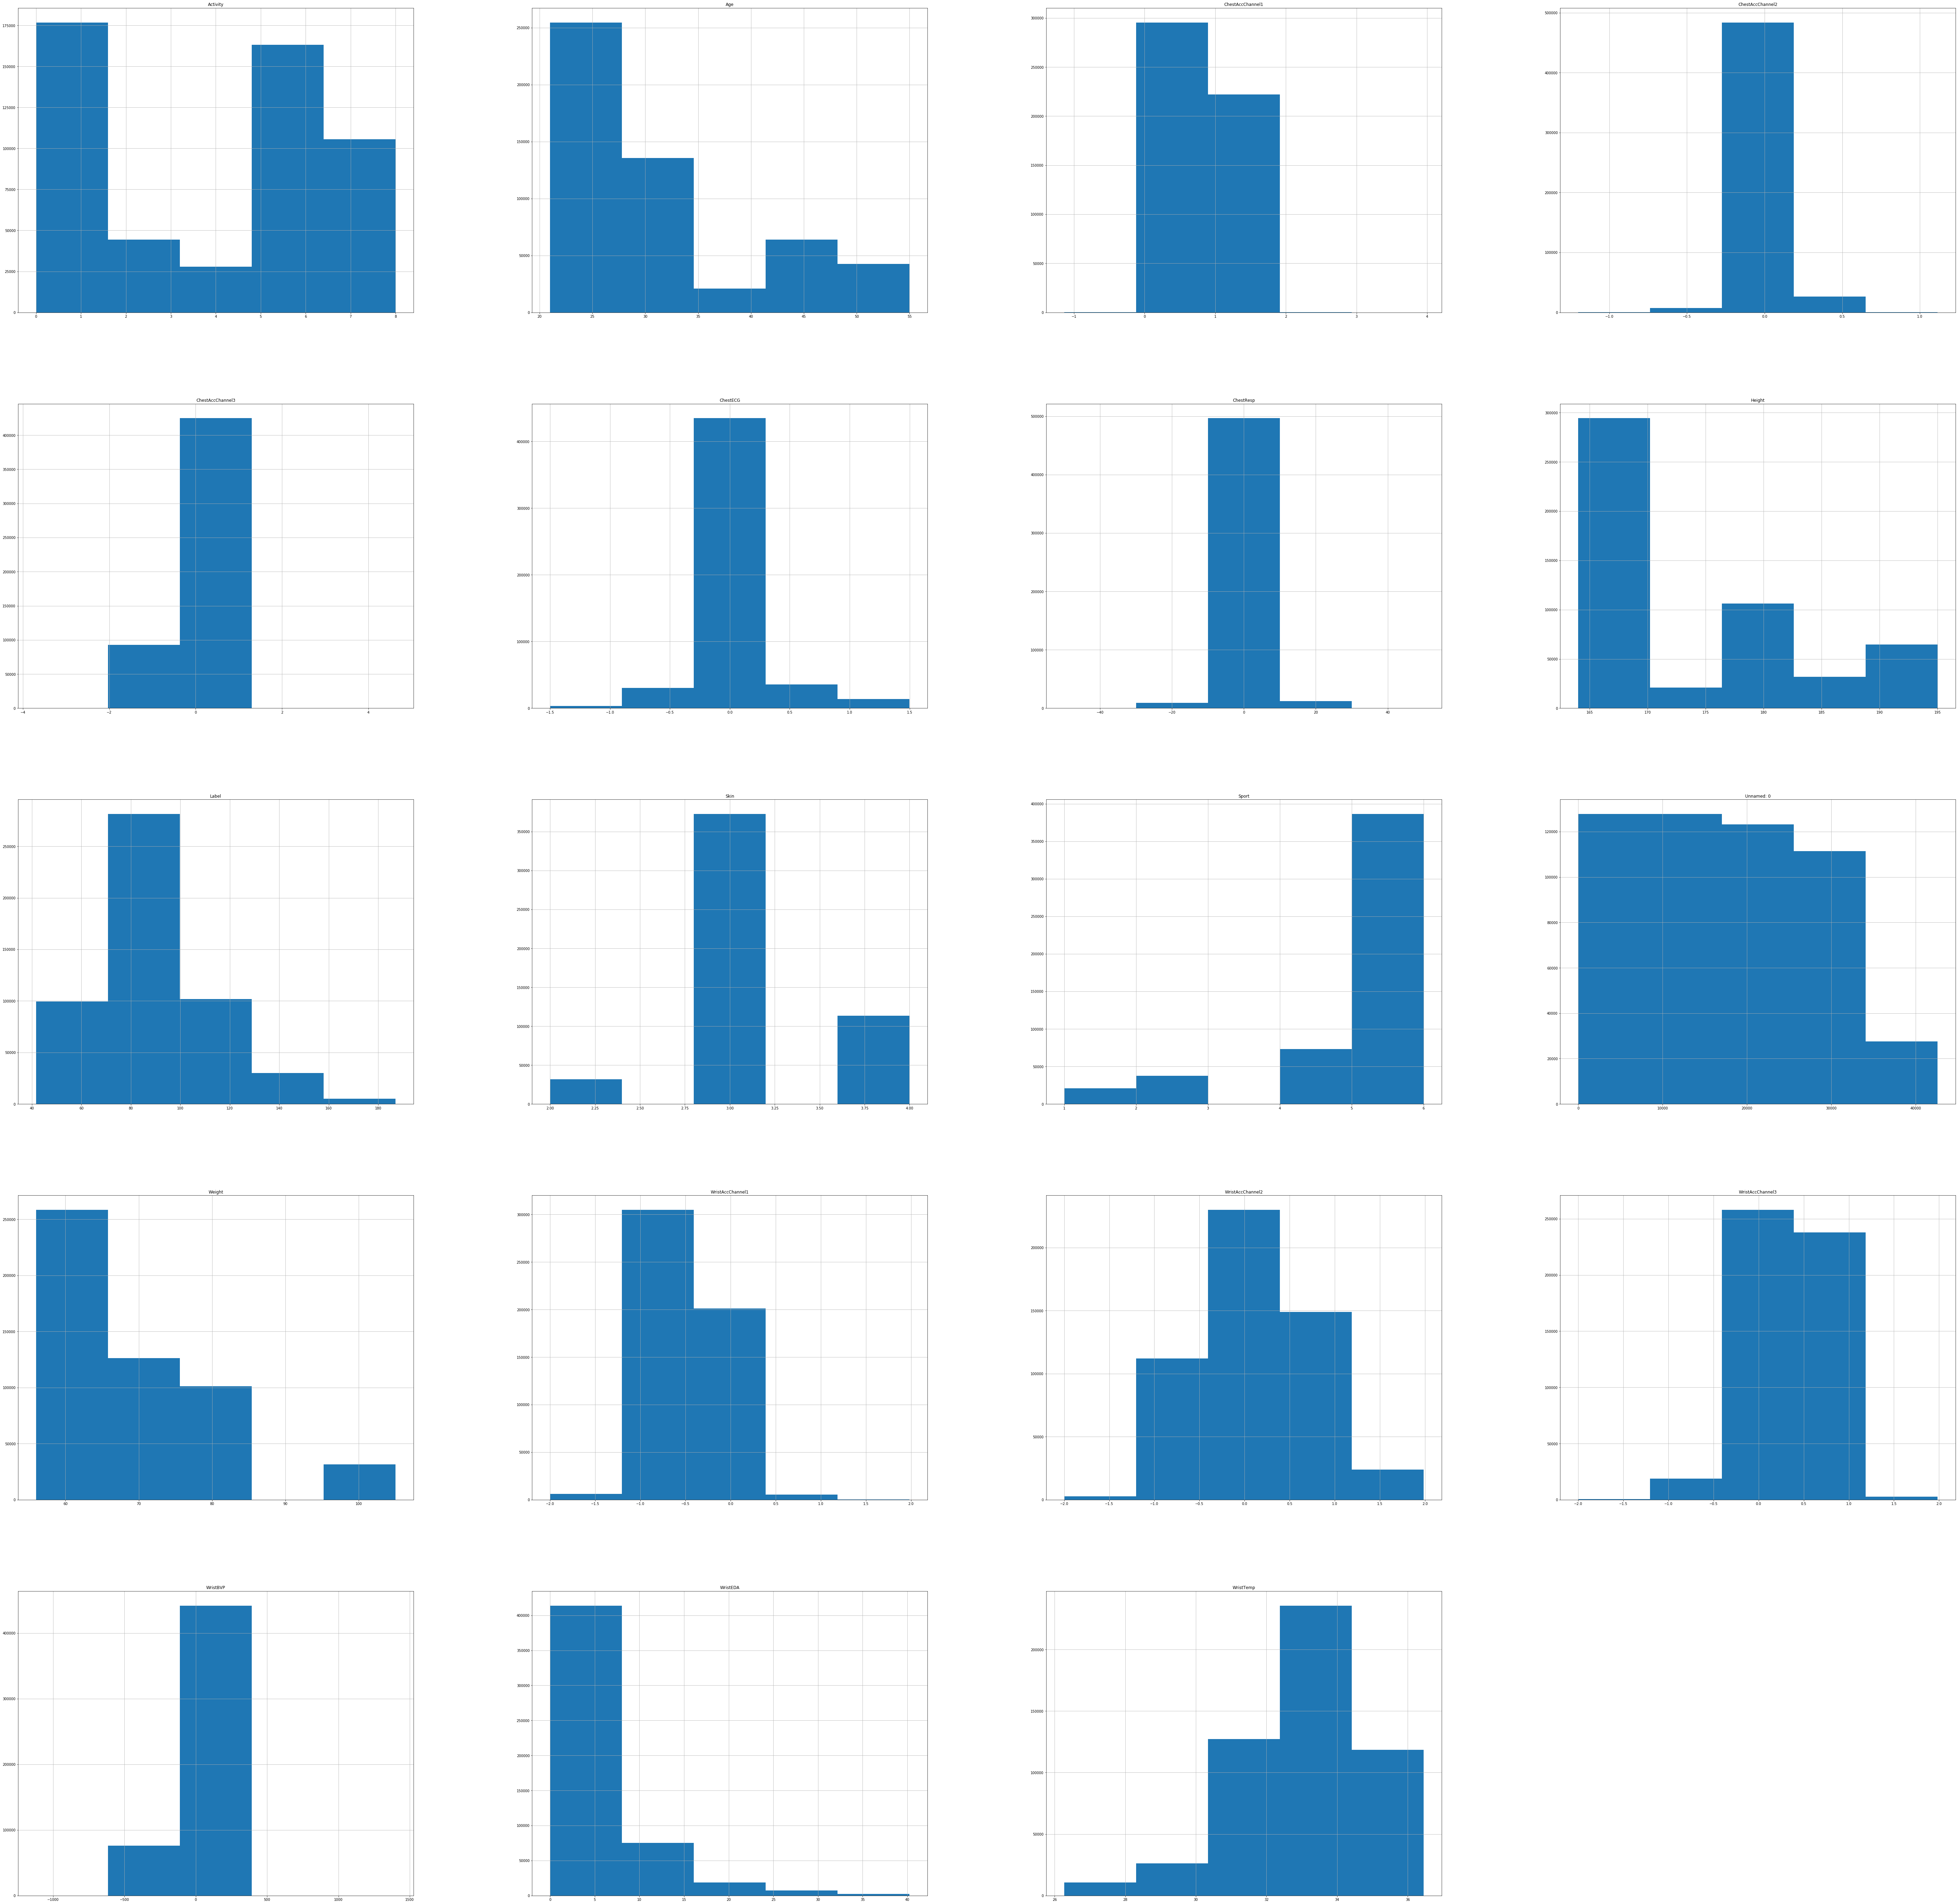

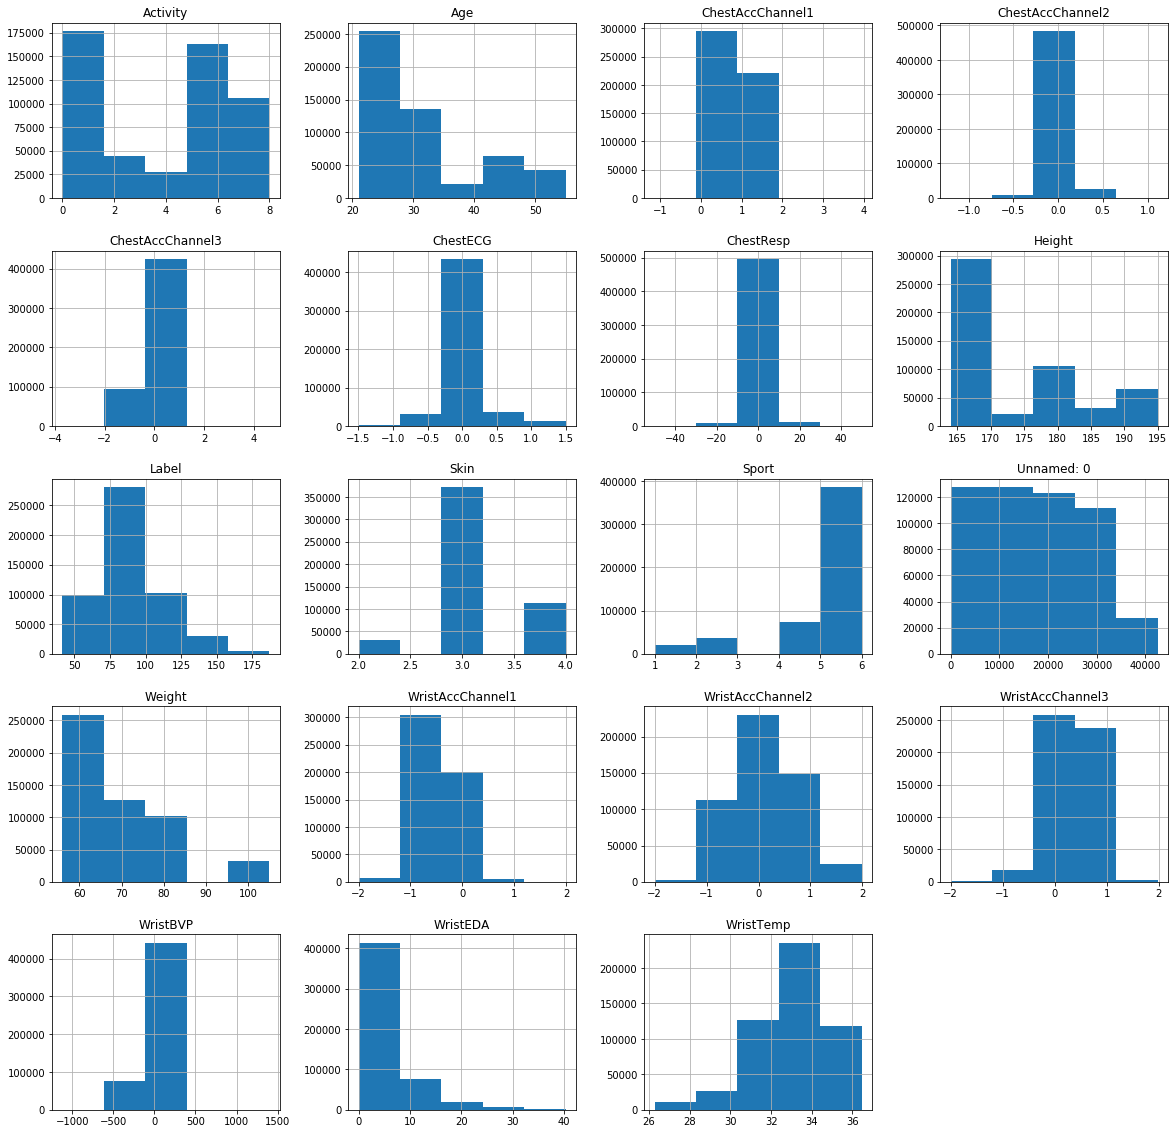

In [91]:
df.hist(bins=5, figsize=(100, 100))
df.hist(bins=5, figsize=(20, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A087F6F60>]],
      dtype=object)

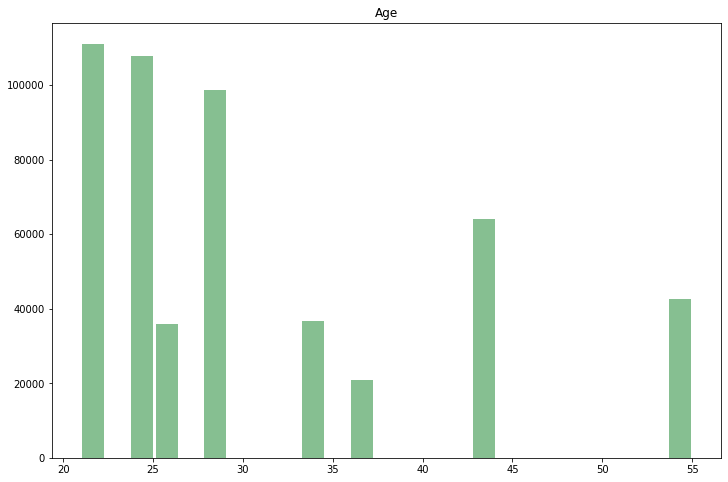

In [92]:
df.hist(column='Age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A098D2F60>]],
      dtype=object)

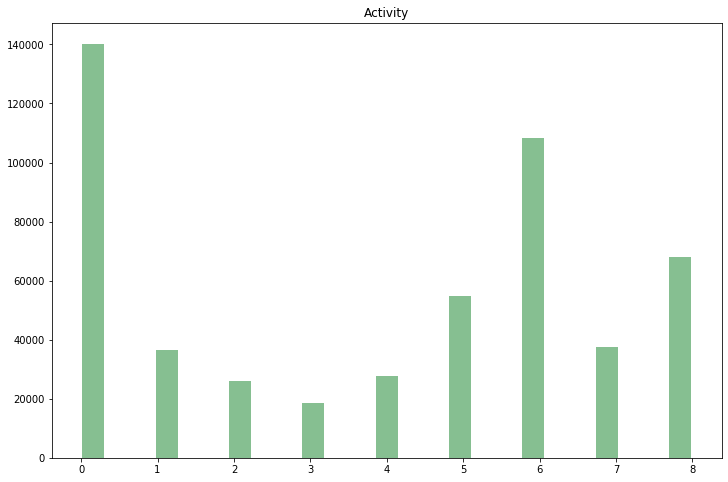

In [93]:
df.hist(column='Activity', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

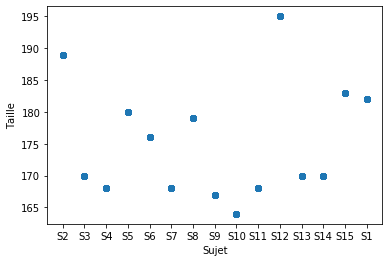

In [94]:
plt.scatter(df["Subject"], df["Height"])
plt.ylabel('Taille')
plt.xlabel("Sujet")
plt.show()

In [95]:
heart_rate=[]
index=[]
for i in range(len(df['WristEDA'])):
    if i%8==0:
        heart_rate.append(df['WristEDA'].iloc[i])
        index.append(i/8)

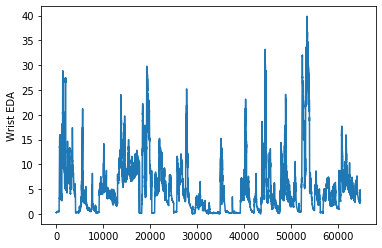

In [96]:
import matplotlib.pyplot as plt
plt.plot(index,heart_rate)
plt.ylabel('Wrist EDA')
plt.show()

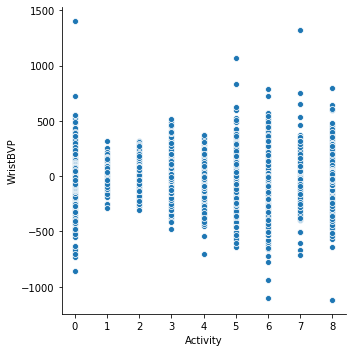

In [97]:
import seaborn as sns
sns.relplot(x="Activity", y="WristBVP", data=df);

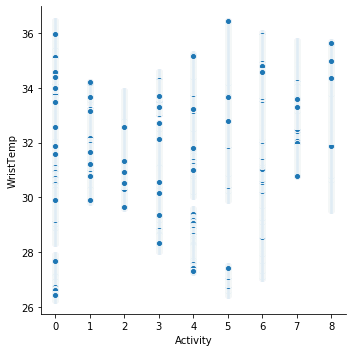

In [98]:
import seaborn as sns
sns.relplot(x="Activity", y="WristTemp", data=df);

## Rapport entre l'indice cardiaque et l'activité d'un sujet

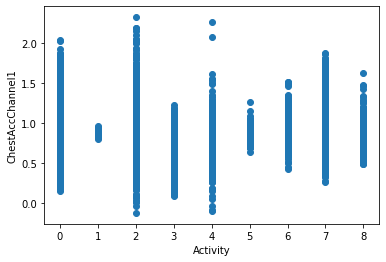

In [99]:
#On teste l'influence de l'indice cardiaque sur l'activité, pour le sujet 2.
from pylab import *
plt.scatter(df['Activity'].loc[df["Subject"] == "S2"], df['ChestAccChannel1'].loc[df["Subject"] == "S2"])
plt.xlabel('Activity')
plt.ylabel("ChestAccChannel1")
plt.show()

## Même rapport en utilisant la moyenne des 3 signaux

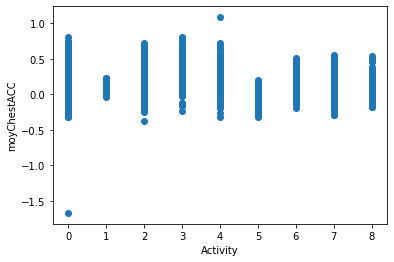

In [100]:
#On essaie en prenant la valeur moyenne des 3 sginaux pour diminuer la perte d'information
col = df.loc[: , "ChestAccChannel2":"ChestAccChannel3"]

df["moyChestACC"] = col.mean(axis=1)

plt.scatter(df['Activity'].loc[df["Subject"] == "S2"], df['moyChestACC'].loc[df["Subject"] == "S2"])
plt.xlabel('Activity')
plt.ylabel("moyChestACC")
plt.show()


## Matrice de correlation 


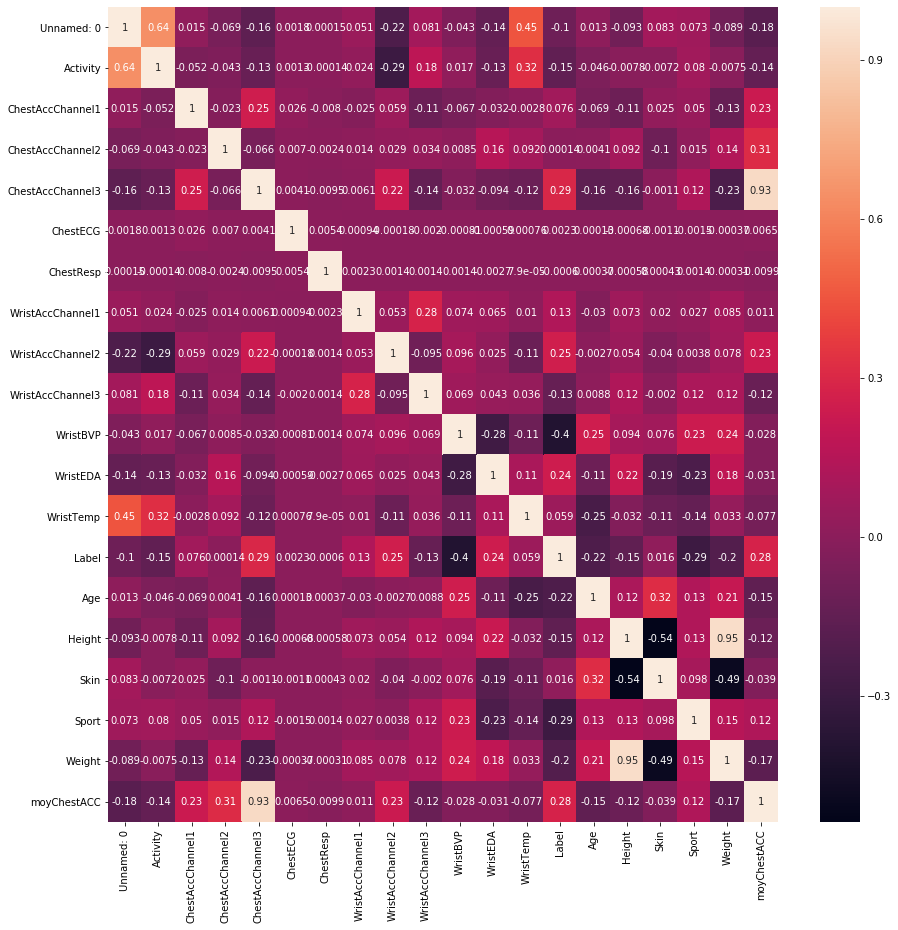

In [101]:
fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(df.corr(), annot=True, ax=ax)

# MODELS
----
Modélisation – prenez scikit-learnn essayez plusieurs algorithmes, changez les hyper paramètres, faites une grille de recherche, comparez les résultats de vos modèles dans des graphiques : 20%

# Transformation des données

In [102]:
#Suppression de la première colonne sans valeur ajoutée
df.drop(df.columns[0], axis=1)

#Transformation de l'info "Genre" pour passer sur un booléen
df['Gender'] = [(1 if x=="m" else x) for x in df['Gender']]
df['Gender'] = [(1 if x==" m" else x) for x in df['Gender']] #même qu'au dessus mais avec un espace
df['Gender'] = [(0 if x==" f" else x) for x in df['Gender']]

#Trasnformation en float
for i in range(1, 16) :
  df['Subject'] = [(i if x=="S"+str(i) else x) for x in df['Subject']]

df["Subject"].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  1],
      dtype=int64)

# Modélisation

In [103]:
from sklearn.model_selection import train_test_split
Y = df["Activity"]
X = df.drop(["Activity"], axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [105]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [106]:
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()

model.fit(xTrain, yTrain)

prediction = model.predict(xTest)

acc = accuracy_score(yTest, prediction)

print ("Précision avec Random forest: ")
print(acc)


C:\Users\Céline\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Préicision avec Random forest: 
0.9967754392739911
